In [5]:
!unzip FaceData.zip

Streaming output truncated to the last 5000 lines.
  inflating: train/sad/im37.png      
  inflating: train/sad/im370.png     
  inflating: train/sad/im3700.png    
  inflating: train/sad/im3701.png    
  inflating: train/sad/im3702.png    
  inflating: train/sad/im3703.png    
  inflating: train/sad/im3704.png    
  inflating: train/sad/im3705.png    
  inflating: train/sad/im3706.png    
  inflating: train/sad/im3707.png    
  inflating: train/sad/im3708.png    
  inflating: train/sad/im3709.png    
  inflating: train/sad/im371.png     
  inflating: train/sad/im3710.png    
  inflating: train/sad/im3711.png    
  inflating: train/sad/im3712.png    
  inflating: train/sad/im3713.png    
  inflating: train/sad/im3714.png    
  inflating: train/sad/im3715.png    
  inflating: train/sad/im3716.png    
  inflating: train/sad/im3717.png    
  inflating: train/sad/im3718.png    
  inflating: train/sad/im3719.png    
  inflating: train/sad/im372.png     
  inflating: train/sad/im3720.png    

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from keras.applications.mobilenet import MobileNet, preprocess_input
from keras.models import Model
from keras.layers import Flatten, Dense

from keras.losses import categorical_crossentropy

from keras.preprocessing.image import ImageDataGenerator 
from tensorflow.keras.utils import img_to_array, load_img

In [11]:
base_model = MobileNet( input_shape=(224,224,3), include_top= False )

for layer in base_model.layers:
  layer.trainable = False


x = Flatten()(base_model.output)
x = Dense(units=7 , activation='softmax' )(x)

# creating our model.
model = Model(base_model.input, x)

17225924/17225924 [==============================] - 0s 0us/step


In [13]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv1 (Conv2D)              (None, 112, 112, 32)      864       
                                                                 
 conv1_bn (BatchNormalizatio  (None, 112, 112, 32)     128       
 n)                                                              
                                                                 
 conv1_relu (ReLU)           (None, 112, 112, 32)      0         
                                                                 
 conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)     288       
                                                                 
 conv_dw_1_bn (BatchNormaliz  (None, 112, 112, 32)     128       
 ation)                                                      

In [12]:
model.compile(optimizer='adam', loss= categorical_crossentropy , metrics=['accuracy']  )

In [17]:
train_datagen = ImageDataGenerator(
     zoom_range = 0.2, 
     shear_range = 0.2, 
     horizontal_flip=True, 
     rescale = 1./255
)

train_data = train_datagen.flow_from_directory(directory= "/content/train", 
                                               target_size=(224,224), 
                                               batch_size=64,
                                  )


train_data.class_indices

Found 28709 images belonging to 7 classes.


{'angry': 0,
 'disgusted': 1,
 'fearful': 2,
 'happy': 3,
 'neutral': 4,
 'sad': 5,
 'surprised': 6}

In [18]:
val_datagen = ImageDataGenerator(rescale = 1./255 )

val_data = val_datagen.flow_from_directory(directory= "/content/train", 
                                           target_size=(224,224), 
                                           batch_size=64,
                                  )

Found 28709 images belonging to 7 classes.


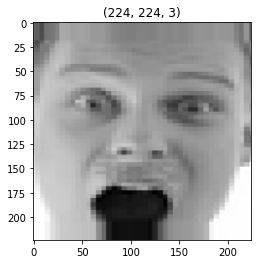

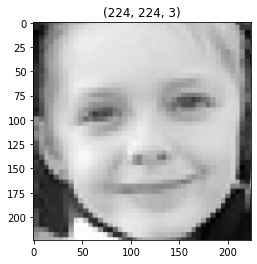

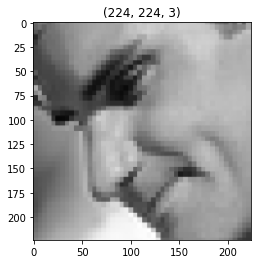

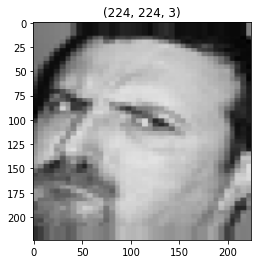

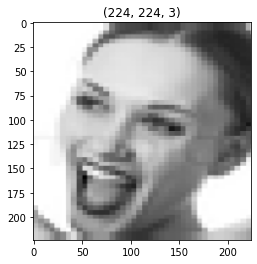

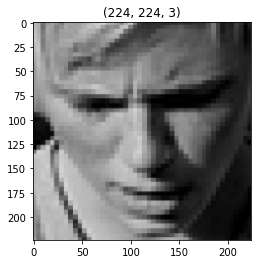

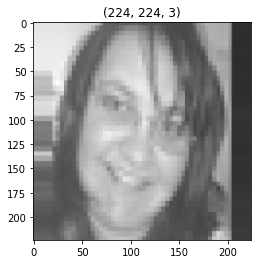

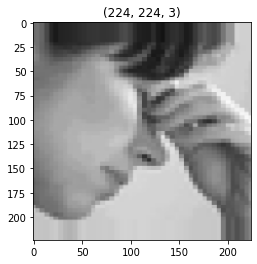

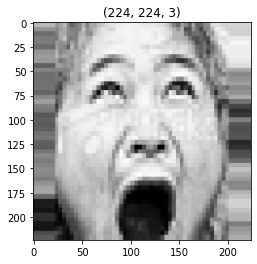

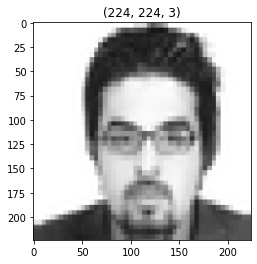

In [19]:
#see the images
t_img , label = train_data.next()

# function when called will prot the images 
def plotImages(img_arr, label):
  """
  input  :- images array 
  output :- plots the images 
  """
  count = 0
  for im, l in zip(img_arr,label) :
    plt.imshow(im)
    plt.title(im.shape)
    plt.axis = False
    plt.show()
    
    count += 1
    if count == 10:
      break

# function call to plot the images 
plotImages(t_img, label)

In [20]:
## having early stopping and model check point 

from keras.callbacks import ModelCheckpoint, EarlyStopping

# early stopping
es = EarlyStopping(monitor='val_accuracy', min_delta= 0.01 , patience= 5, verbose= 1, mode='auto')

# model check point and name
mc = ModelCheckpoint(filepath="EmotionDModel.h5", monitor= 'val_accuracy', verbose= 1, save_best_only= True, mode = 'auto')

# puting call back in a list 
call_back = [es, mc]

In [22]:
hist = model.fit_generator(train_data, 
                           steps_per_epoch= 10, 
                           epochs= 30, 
                           validation_data= val_data, 
                           validation_steps= 10, 
                           callbacks=[es,mc])

<ipython-input-22-3804cf4f2717>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  hist = model.fit_generator(train_data,


Epoch 1/30
10/10 [==============================] - ETA: 0s - loss: 4.1429 - accuracy: 0.4172
Epoch 1: val_accuracy did not improve from 0.46680
10/10 [==============================] - 45s 5s/step - loss: 4.1429 - accuracy: 0.4172 - val_loss: 4.1951 - val_accuracy: 0.4500
Epoch 2/30
10/10 [==============================] - ETA: 0s - loss: 3.3883 - accuracy: 0.5000
Epoch 2: val_accuracy did not improve from 0.46680
10/10 [==============================] - 45s 5s/step - loss: 3.3883 - accuracy: 0.5000 - val_loss: 3.3382 - val_accuracy: 0.4484
Epoch 3/30
10/10 [==============================] - ETA: 0s - loss: 3.7424 - accuracy: 0.4344
Epoch 3: val_accuracy improved from 0.46680 to 0.49687, saving model to EmotionDModel.h5
10/10 [==============================] - 45s 5s/step - loss: 3.7424 - accuracy: 0.4344 - val_loss: 2.8552 - val_accuracy: 0.4969
Epoch 4/30
10/10 [==============================] - ETA: 0s - loss: 3.3223 - accuracy: 0.4891
Epoch 4: val_accuracy improved from 0.49687 to

In [23]:
# Loading the best fit model 
from keras.models import load_model
model = load_model("/content/EmotionDModel.h5")

In [24]:
h =  hist.history
h.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

after validation the accuracy

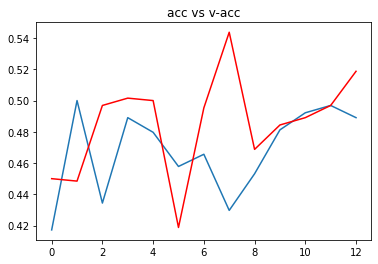

In [25]:
plt.plot(h['accuracy'])
plt.plot(h['val_accuracy'] , c = "red")
plt.title("acc vs v-acc")
plt.show()

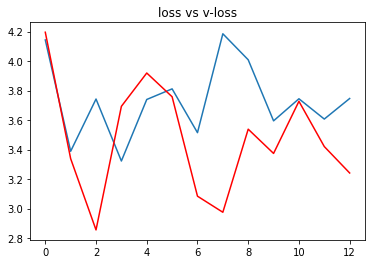

In [26]:
plt.plot(h['loss'])
plt.plot(h['val_loss'] , c = "red")
plt.title("loss vs v-loss")
plt.show()

In [27]:
op = dict(zip( train_data.class_indices.values(), train_data.class_indices.keys()))

1/1 [==============================] - 0s 54ms/step
 the image is of neutral


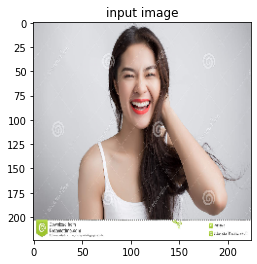

In [30]:
# path for the image to see if it predics correct class

path = "/content/sm2.jpg"
img = load_img(path, target_size=(224,224) )

i = img_to_array(img)/255
input_arr = np.array([i])
input_arr.shape

pred = np.argmax(model.predict(input_arr))

print(f" the image is of {op[pred]}")

# to display the image  
plt.imshow(input_arr[0])
plt.title("input image")
plt.show()